# Figure - Multispot PR comparison

> *This notebook plots comparisons of fitted FRET from multispot measurements with different methods.*

## Import software

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'  # for hi-dpi displays
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator

In [2]:
import re
from collections import defaultdict
from mpl_toolkits.mplot3d import Axes3D
from numpy import pi, cos, sin

In [3]:
figure_size = (5, 4)
default_figure = lambda: plt.subplots(figsize=figure_size)
save_figures = True

def savefig(filename, **kwargs):
    if not save_figures:
        return
    import os
    dir_ = 'figures/'
    kwargs_ = dict(dpi=300, bbox_inches='tight')
                   #frameon=True, facecolor='white', transparent=False)
    kwargs_.update(kwargs)
    plt.savefig(dir_ + filename, **kwargs_)

In [4]:
sns.set_style('whitegrid')

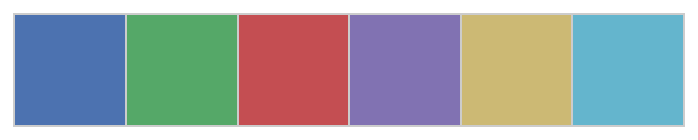

In [5]:
sns.palplot(sns.color_palette())

# Load data

In [6]:
PR_mspotx = pd.read_csv('results/Multispot 5samples PR all channels - Xavier.csv',
                       index_col=(0,1))
PR_mspotx = PR_mspotx.applymap(lambda x: float(re.sub('(\(.+\))?', '', x)))
PR_mspotx

0     1     2     3     4     5     6     7
Sample Method                                                
7d     Gauss   0.86  0.80  0.82  0.84  0.83  0.79  0.84  0.84
       KDE     0.88  0.79  0.80  0.86  0.85  0.83  0.85  0.86
       SNA     0.86  0.84  0.83  0.85  0.84  0.84  0.84  0.85
12d    Gauss   0.57  0.55  0.54  0.55  0.54  0.54  0.54  0.55
       KDE     0.59  0.61  0.61  0.54  0.56  0.56  0.56  0.57
       SNA     0.58  0.54  0.54  0.54  0.53  0.53  0.54  0.54
17d    Gauss   0.29  0.27  0.26  0.27  0.27  0.27  0.26  0.27
       KDE     0.31  0.27  0.25  0.26  0.29  0.29  0.24  0.27
       SNA     0.28  0.26  0.25  0.26  0.27  0.27  0.25  0.26
22d    Gauss   0.12  0.12  0.10  0.10  0.09  0.11  0.10  0.11
       KDE     0.11  0.11  0.09  0.09  0.08  0.11  0.11  0.08
       SNA     0.10  0.11  0.08  0.08  0.07  0.10  0.07  0.07
27d    Gauss   0.08  0.09  0.07  0.07  0.07  0.08  0.07  0.07
       KDE     0.08  0.08  0.07  0.07  0.07  0.07  0.07  0.07
       SNA     0.08  0.08  0.07  0.07  0.07  0.07  0.06  0.07

In [7]:
PR_mspotxt = PR_mspotx.reset_index()
PR_mspotxt.head(3)

,Sample,Method,0,1,2,3,4,5,6,7
0,7d,Gauss,0.86,0.80,0.82,0.84,0.83,0.79,0.84,0.84
1,7d,KDE,0.88,0.79,0.80,0.86,0.85,0.83,0.85,0.86
2,7d,SNA,0.86,0.84,0.83,0.85,0.84,0.84,0.84,0.85


In [8]:
PR_mspotxtt = pd.melt(PR_mspotxt, id_vars=['Sample', 'Method'], var_name='Channel', value_name='PR')
PR_mspotxtt.head(3)

,Sample,Method,Channel,PR
0,7d,Gauss,0,0.86
1,7d,KDE,0,0.88
2,7d,SNA,0,0.86


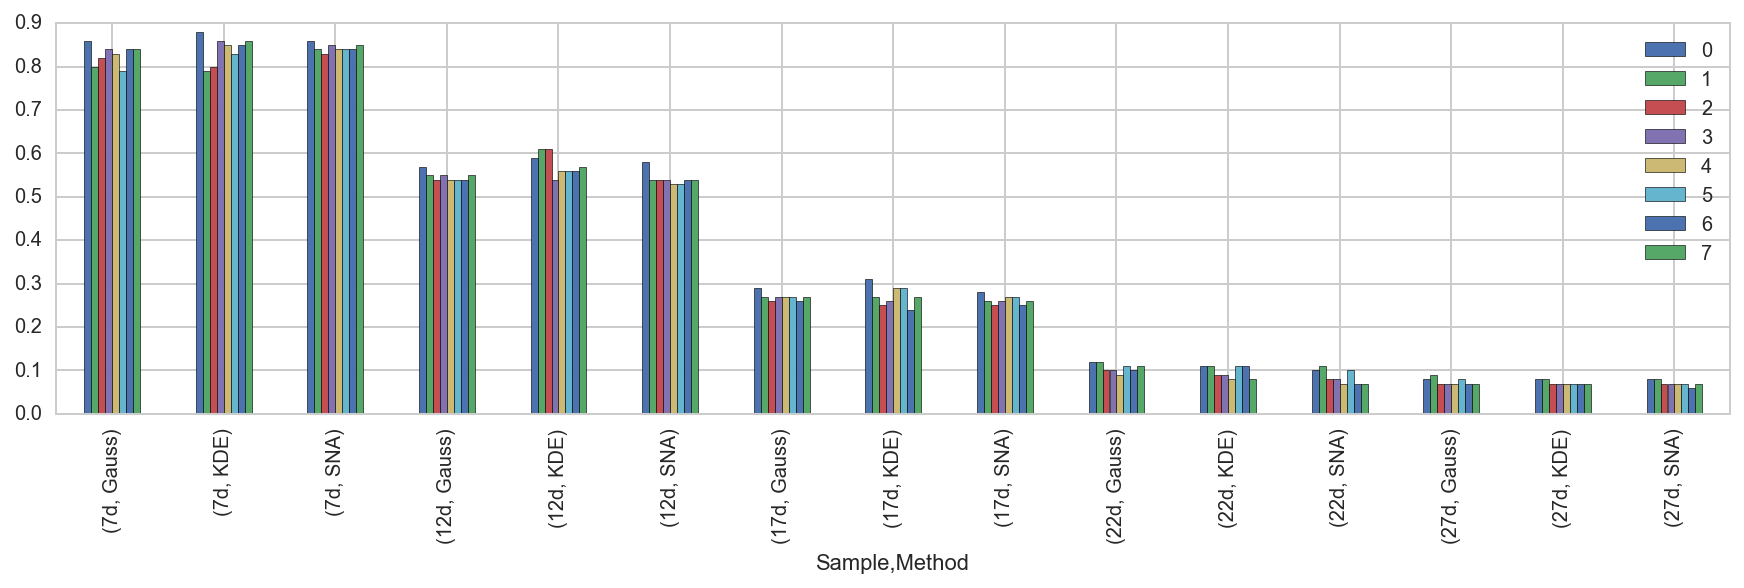

In [9]:
fig, ax = plt.subplots(figsize=(15,3.5))
PR_mspotx.plot.bar(ax=ax)

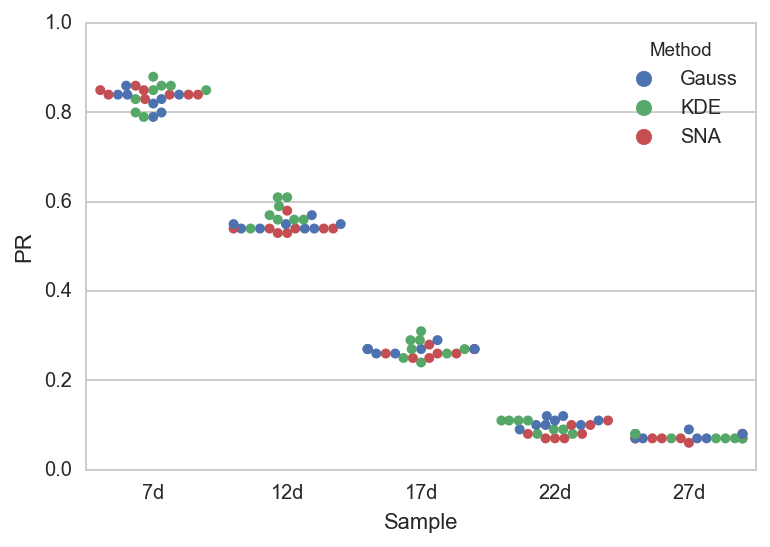

In [10]:
sns.swarmplot(x="Sample", y="PR", hue='Method', data=PR_mspotxtt);

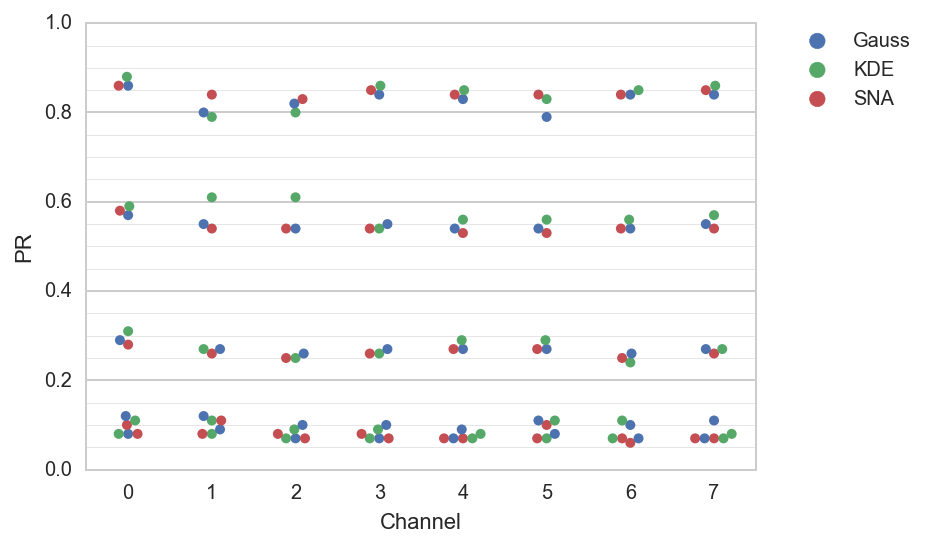

In [11]:
sns.swarmplot(x="Channel", y="PR", hue='Method', data=PR_mspotxtt);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(4))
plt.grid(b=True, which='minor', axis='y', linestyle='-', lw=0.5, color='0.9')

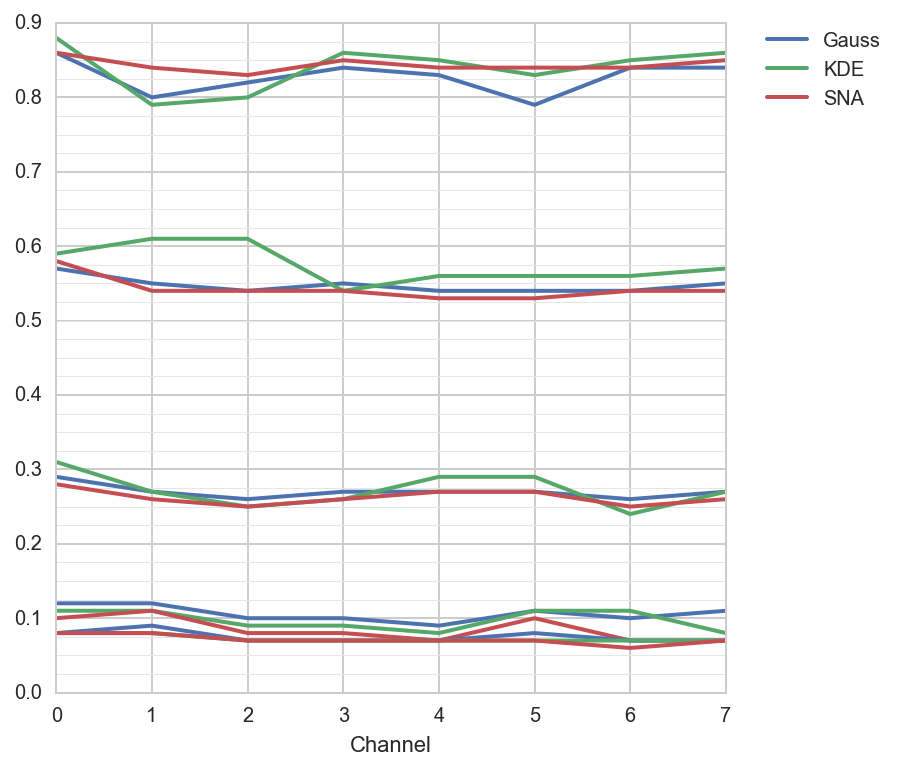

In [12]:
meth_cy = iter(cycler('color', sns.color_palette()))
meth_cy_dict = defaultdict(lambda : next(meth_cy))
fig, ax = plt.subplots(figsize=(6, 6))
for sample in ('7d', '12d', '17d', '22d', '27d'):
    for method in ('Gauss', 'KDE', 'SNA'):
        E0 = PR_mspotx.loc[(sample, method)]
        E0.plot(ax=ax, lw=2, **meth_cy_dict[method])
plt.legend(['Gauss', 'KDE', 'SNA'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.xlabel("Channel")
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(4))
plt.grid(b=True, which='minor', axis='y', linestyle='-', lw=0.5, color='0.9')

In [13]:
PR_mspot = pd.read_csv('results/Multi-spot - dsDNA - PR - all_samples all_ch.csv',
                       index_col=0)
PR_mspot

,0,1,2,3,4,5,6,7
Sample,,,,,,,,
7d,0.866766,0.872245,0.838805,0.843370,0.835858,0.858535,0.840360,0.846814
12d,0.589120,0.580325,0.572867,0.574415,0.563134,0.555029,0.565811,0.563246
17d,0.297846,0.287886,0.276148,0.279504,0.283104,0.284872,0.271156,0.271861
22d,0.133968,0.131691,0.124933,0.126694,0.119514,0.124942,0.122458,0.129830
27d,0.087183,0.091312,0.079124,0.082680,0.077164,0.084574,0.077923,0.082638


In [14]:
PR_mspott = pd.melt(PR_mspot.reset_index(), id_vars='Sample', var_name='Channel', value_name='PR')
PR_mspott.head(3)

,Sample,Channel,PR
0,7d,0,0.866766
1,12d,0,0.589120
2,17d,0,0.297846


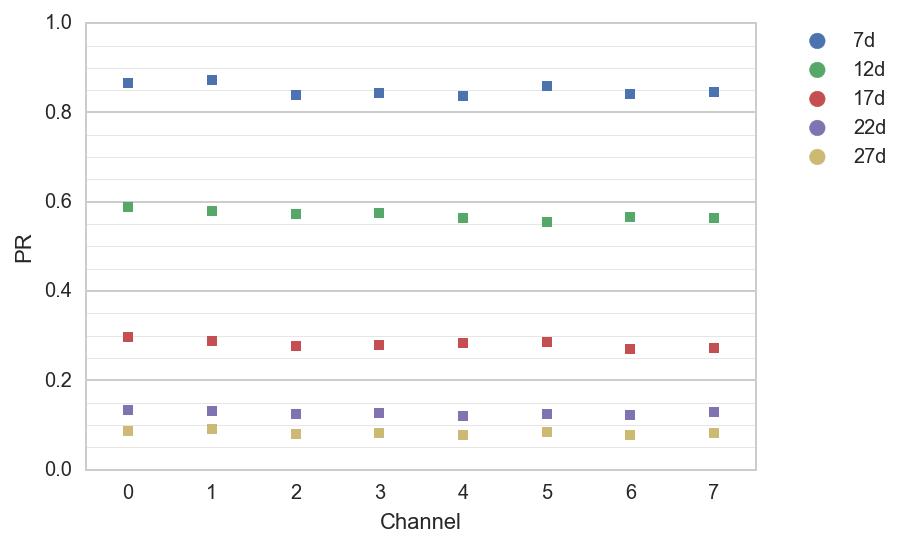

In [15]:
sns.swarmplot(x="Channel", y="PR", hue='Sample', marker='s', data=PR_mspott);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(4))
plt.grid(b=True, which='minor', axis='y', linestyle='-', lw=0.5, color='0.9')

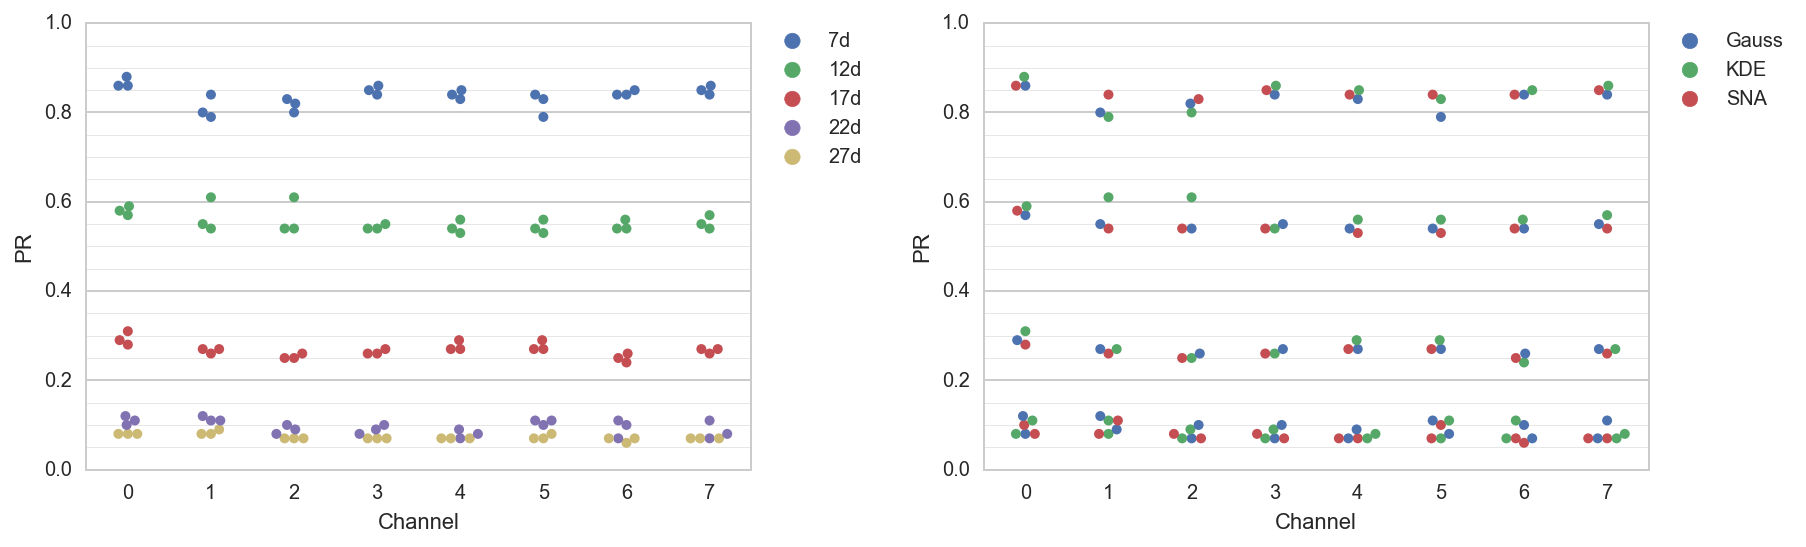

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
plt.subplots_adjust(wspace=0.35)
sns.swarmplot(x="Channel", y="PR", hue='Sample', data=PR_mspotxtt, ax=ax[0]);
sns.swarmplot(x="Channel", y="PR", hue='Method', data=PR_mspotxtt, ax=ax[1]);
for a in ax:
    a.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.);
    a.yaxis.set_minor_locator(AutoMinorLocator(4))
    a.grid(b=True, which='minor', axis='y', linestyle='-', lw=0.5, color='0.9')

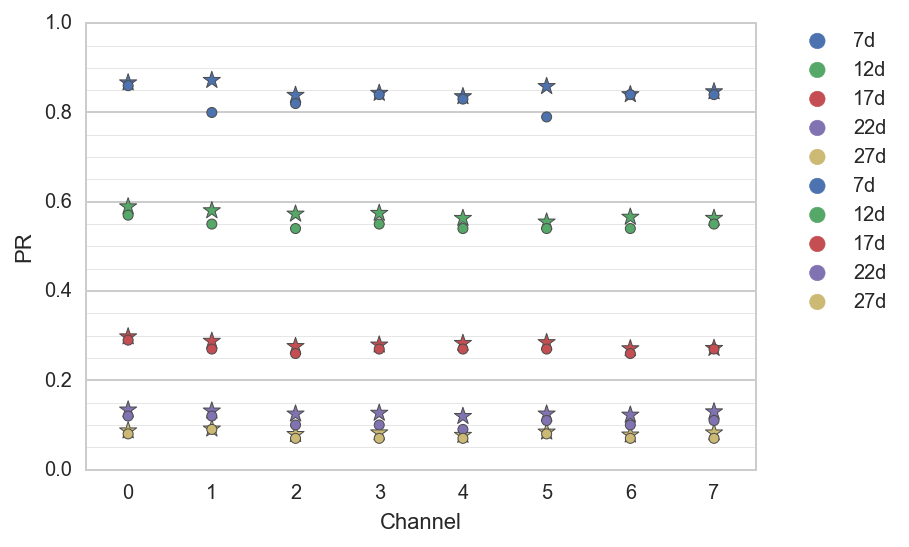

In [24]:
sns.stripplot(x="Channel", y="PR", hue='Sample', marker='*', size=9, lw=0.5, data=PR_mspott);
sns.stripplot(x="Channel", y="PR", hue='Sample', lw=0.5, data=PR_mspotxtt.query('Method=="Gauss"'));
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(4))
plt.grid(b=True, which='minor', axis='y', linestyle='-', lw=0.5, color='0.9')

In [18]:
100*(PR_mspot.max(1) - PR_mspot.min(1))

Sample
7d     3.638719
12d    3.409037
17d    2.668973
22d    1.445401
27d    1.414807
dtype: float64

In [19]:
100*(PR_mspotx.query('Method=="Gauss"').max(1) - PR_mspotx.query('Method=="Gauss"').min(1))

Sample  Method
7d      Gauss     7.0
12d     Gauss     3.0
17d     Gauss     3.0
22d     Gauss     3.0
27d     Gauss     2.0
dtype: float64